In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)



In [84]:
# Get the Size of Subway data using 
# 1: DataFrame.shape 
# 2: DataFrame.axes
# 3: DataFrame.index and DataFrame.columns

subway_df.shape
#[len(subway_df.axes[0]), len(subway_df.axes[1])]
#[len(subway_df.index), len(subway_df.columns)]

(42649, 27)

In [85]:
# Data Exploration: By examining the first few rows helps me understand the variables, their data types (e.g., numeric, text, 
# date), and the general structure of the dataset.
# For a dataset of 43,000 rows, I should typically look at the first 100 to 500 rows to get a good overview of the data 
# structure, identify potential issues, and understand the data types and values. 
# Display the first 100 rows using
# 1: DataFrame.head(n=5)
# 2: DataFrame.iloc

subway_df.head(10)
#subway_df.iloc[0:10]


,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,5/1/2011,0:00:00,4388333,2911002,0,0,5/1/2011 0:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
1,R003,5/1/2011,4:00:00,4388333,2911002,0,0,5/1/2011 4:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
2,R003,5/1/2011,12:00:00,4388333,2911002,0,0,5/1/2011 12:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
3,R003,5/1/2011,16:00:00,4388333,2911002,0,0,5/1/2011 16:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
4,R003,5/1/2011,20:00:00,4388333,2911002,0,0,5/1/2011 20:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
5,R003,5/2/2011,0:00:00,4388348,2911036,15,34,5/2/2011 0:00,0,0,...,30.31,0,50.0,6.9,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
6,R003,5/2/2011,4:00:00,5818689,3874767,19,40,5/2/2011 4:00,4,0,...,30.27,0,50.0,4.6,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
7,R003,5/2/2011,8:00:00,4388855,2911194,488,118,5/2/2011 8:00,8,0,...,30.30,0,53.1,10.4,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
8,R003,5/2/2011,12:00:00,4389345,2911326,490,132,5/2/2011 12:00,12,0,...,30.24,0,57.0,11.5,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
9,R003,5/2/2011,16:00:00,4389576,2911558,231,232,5/2/2011 16:00,16,0,...,30.16,0,59.0,11.5,0.0,30.238333,54.166667,8.25,40.700348,-73.887177


In [120]:
# Investigate data types of each columns
#subway_df.dtypes

In [86]:
# Select Data
r3_r50_df =subway_df.loc[(subway_df['UNIT'] >= 'R003') & (subway_df['UNIT'] <= 'R050'), ['UNIT','DATEn', 'ENTRIESn_hourly']]
r3_r50_df = r3_r50_df.groupby(['UNIT', 'DATEn'])['ENTRIESn_hourly'].sum().reset_index(name ='Total Riders')
r3_r50_df

,UNIT,DATEn,Total Riders
0,R003,5/1/2011,0
1,R003,5/10/2011,1342
2,R003,5/11/2011,1881
3,R003,5/12/2011,1559
4,R003,5/13/2011,1524
...,...,...,...
1235,R050,5/5/2011,26752
1236,R050,5/6/2011,32725
1237,R050,5/7/2011,17033
1238,R050,5/8/2011,11821


In [87]:
# Update 'DATEn' coulmn type(str) to Datetime
r3_r50_df['DATEn'] = pd.to_datetime(r3_r50_df['DATEn'])   

# Check Info of the data
#subway_df.info()
 

In [88]:
# Pivot the dataframe
r3_r50_df = r3_r50_df.pivot(index='DATEn', columns='UNIT', values='Total Riders')
r3_r50_df



UNIT,R003,R004,R005,R006,R007,R008,R009,R011,R012,R013,...,R038,R039,R040,R041,R042,R043,R044,R046,R049,R050
DATEn,,,,,,,,,,,,,,,,,,,,,
2011-05-01,0,0,2,5,0,0,1,22776,32246,9090,...,917,3653,4839,7162,2970,7766,15086,24592,8022,12837
2011-05-02,1478,3877,3674,2328,2539,2738,2226,52305,59843,17984,...,1930,5624,8880,23809,3858,21681,22966,54809,18501,25064
2011-05-03,1613,4088,3991,6461,2691,2954,2332,50505,57334,18481,...,1952,5772,9298,25394,4288,22891,49859,58757,17806,28845
2011-05-04,1560,3392,3826,4787,2613,2876,2364,62746,66021,19911,...,1937,5647,9050,20044,3329,24427,35690,66001,24944,29144
2011-05-05,1608,4802,3932,4477,2705,2996,2392,51984,63922,19748,...,1976,4513,9628,29361,4219,23738,38515,62790,22160,26752
2011-05-06,1576,3933,3909,4979,2685,3002,2437,51828,61655,18727,...,1982,7285,9509,24629,4430,23120,35054,61989,21988,32725
2011-05-07,95,229,255,496,201,201,242,25753,32358,8482,...,124,593,730,8104,2851,7651,14305,31225,9684,17033
2011-05-08,2,0,1,27,0,0,0,20624,26557,7171,...,0,0,3,5423,2173,5089,10362,23390,6645,11821
2011-05-09,1438,3785,3589,4174,2215,2769,2114,48997,58921,17734,...,1798,4919,6734,23399,4174,21754,33052,55957,17788,25432


In [62]:
#r3_r12_df.describe()

In [89]:
# Find the station with the maximum riders on the first day, then return the mean riders per day for that station. Also return 
# the mean ridership overall for comparsion.
max_station_day_1 = r3_r50_df.idxmax(axis=1)[0]
mean_for_max = round(r3_r50_df[max_station_day_1].mean(axis=0), 2)
r3_r50_mean = round(r3_r50_df.values.mean(), 2)
print('Station with the maximum riders on the first day: {0}\nMean riders per day for the station \'{0}\': {1} \nMean ridership overall: {2}'.format(max_station_day_1, mean_for_max, r3_r50_mean))

Station with the maximum riders on the first day: R033
Mean riders per day for the station 'R033': 49504.9 
Mean ridership overall: 20638.27


Correlation between 'ENTRIESn_hourly' vs 'Rain': 0.04
Correlation between 'ENTRIESn_hourly' vs 'Temperature': -0.03
Correlation between 'Rain' vs 'Temperature': -0.23
Correlation between 'ENTRIESn_hourly' vs 'Accumulative Entries': 0.59
       ENTRIESn  ENTRIESn_hourly  meanprecipi  meantempi
4548  114298855            14197          0.0  57.683333
4549  114305213             6358          0.0  57.683333
4550   75763728              759          0.0  57.683333
4551  113138410             4272          0.0  57.683333
4552  113144423             6013          0.0  57.683333
...         ...              ...          ...        ...
4729  156679238             2539          0.0  78.316667
4730  124701946             1523          0.0  78.316667
4731  136564754             7558          0.0  78.316667
4732  135304170             8469          0.0  78.316667
4733  136593390            20167          0.0  78.316667

[186 rows x 4 columns]


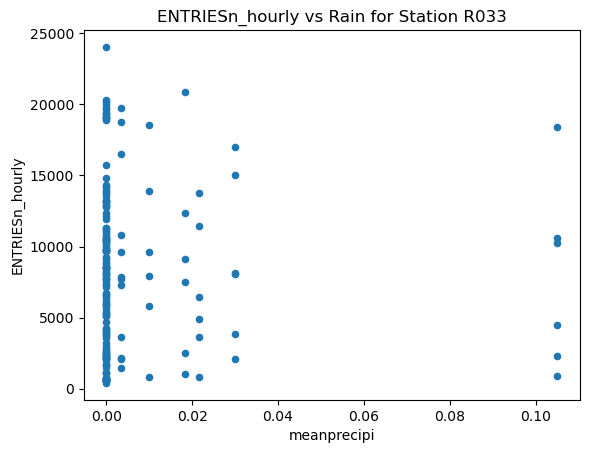

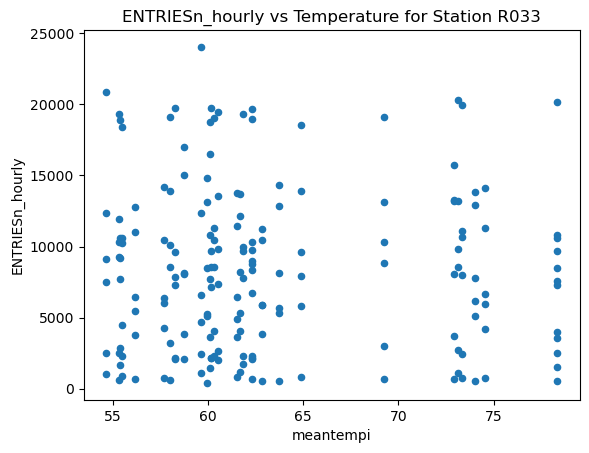

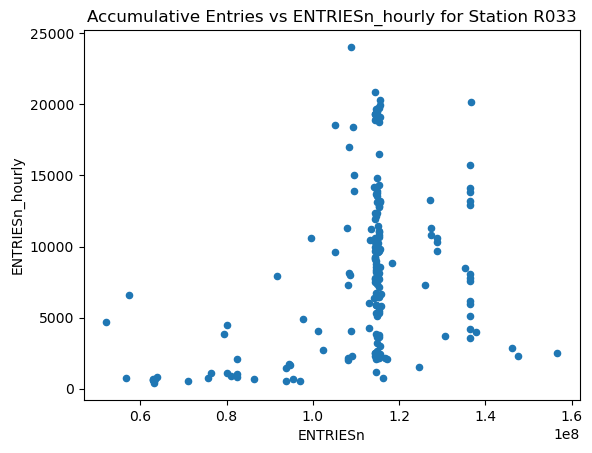

In [90]:
# Function to compute the correlation between the tw0 input variables. Each input is either a NumPy array or a Pandas Series.
# correlation = average of (x in standard units) times (y in standard units)
# Set the argument "ddof=0" in the Pandas std() function
def correlation(x, y):
    cov = np.cov(x, y, ddof=0)[0][1]
    return cov / (x.std(ddof=0) * y.std(ddof=0))
    #return np.corrcoef(x, y)[0][1]
entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']
print('Correlation between \'ENTRIESn_hourly\' vs \'Rain\': {}'.format(round(correlation(entries, rain), 2)))
print('Correlation between \'ENTRIESn_hourly\' vs \'Temperature\': {}'.format(round(correlation(entries, temp), 2)))
print('Correlation between \'Rain\' vs \'Temperature\': {}'.format(round(correlation(rain, temp), 2)))
print('Correlation between \'ENTRIESn_hourly\' vs \'Accumulative Entries\': {}'.format(round(correlation(entries, cum_entries), 2)))

max_entries = subway_df.loc[(subway_df['UNIT'] == max_station_day_1) , ['ENTRIESn', 'ENTRIESn_hourly', 'meanprecipi', 'meantempi']]
print(max_entries)
max_entries.plot(kind = 'scatter', x = 'meanprecipi' , y = 'ENTRIESn_hourly', title='ENTRIESn_hourly vs Rain for Station R033')
plt.show()

max_entries.plot(kind = 'scatter', x = 'meantempi' , y = 'ENTRIESn_hourly', title='ENTRIESn_hourly vs Temperature for Station R033')
plt.show()
max_entries.plot(kind = 'scatter', x = 'ENTRIESn' , y = 'ENTRIESn_hourly', title='Accumulative Entries vs ENTRIESn_hourly for Station R033')
plt.show()

<Axes: title={'center': 'Monthy Average riders vs Maximum riders plot for stations from R001 to R050'}, xlabel='UNIT'>

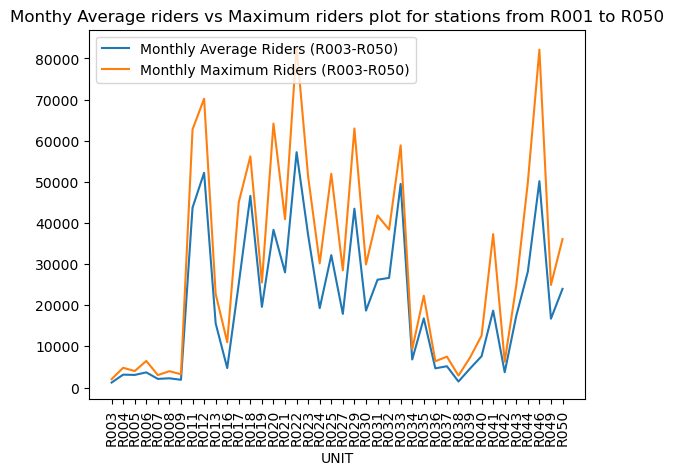

In [91]:
# Find monthly average and maximum riders for 1-50 stations
# Visualize average riders vs maximum riders in the line plot
#subway_df["ENTRIESn_hourly"].plot(kind = 'hist')
#r3_r50_df.mean(axis=0).plot(kind = 'hist')
r3_r50_average_series = r3_r50_df.mean(axis=0)
r3_r50_max_series = r3_r50_df.max(axis=0)
#r3_r50_df_max
average_max_df = pd.DataFrame(
    {
        'Monthly Average Riders (R003-R050)': r3_r50_average_series,
        'Monthly Maximum Riders (R003-R050)': r3_r50_max_series,
    }
)
average_max_df.plot(title='Monthy Average riders vs Maximum riders plot for stations from R001 to R050', xticks=range(len(average_max_df)),
    rot=90)


In [92]:
# Categorize stations by montly average ridership into 3 groups
# 1. 'Below 10k'
# 2. 'Between 10k and 20k'
# 3. 'Above 20k'
r3_r50_average_df = pd.DataFrame(r3_r50_average_series,
                    columns=['Monthly Average Riders'])
r3_r50_average_df 
values = r3_r50_average_df['Monthly Average Riders']
grouping_df = pd.DataFrame({
    'value': values,
    'Below 10k':values < 10000,
    'Between 10k and 20k': (values >= 10000) & (values < 20000),
    'Above 20k': values >= 20000 
}, index=r3_r50_average_df.index)

grouped_below_10k = grouping_df.groupby('Below 10k')
grouped_between_10k_20k = grouping_df.groupby('Between 10k and 20k')
grouped_between_above_20k = grouping_df.groupby('Above 20k')
grouped_all = grouping_df.groupby(['Below 10k', 'Between 10k and 20k', 'Above 20k'])
grouping_df
# Print out the mean ridership within each group
print(grouped_below_10k['value'].mean())
print(grouped_between_10k_20k['value'].mean())
print(grouped_between_above_20k['value'].mean())

Below 10k
False    30778.212903
True      3738.354839
Name: value, dtype: float64
Between 10k and 20k
False    21444.525494
True     17861.150538
Name: value, dtype: float64
Above 20k
False     9034.403226
True     38044.060484
Name: value, dtype: float64


<Axes: xlabel='UNIT'>

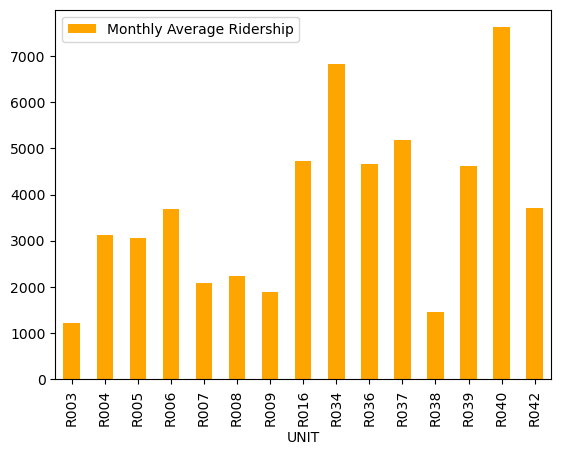

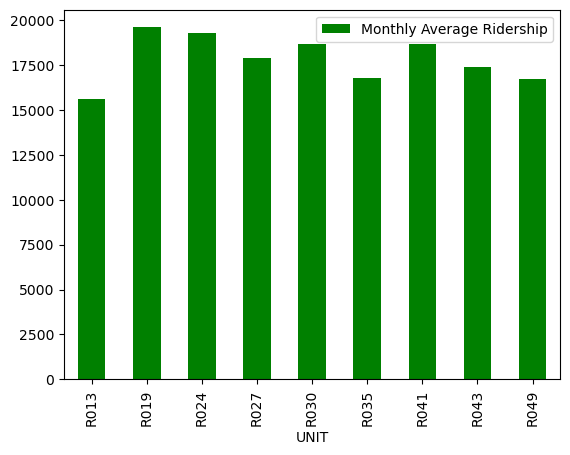

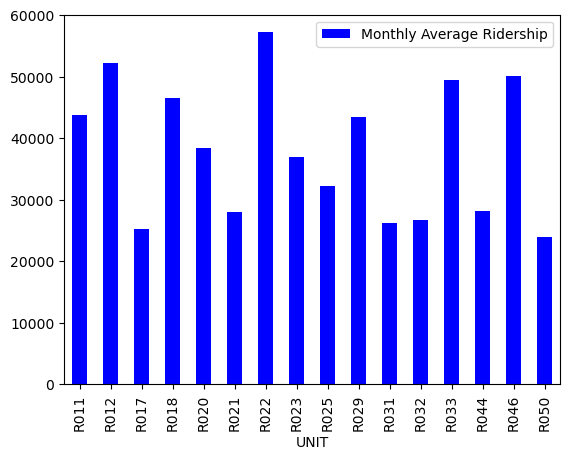

In [93]:
# Create dataframes for each group and plot each group 
below_10k = grouping_df.loc[grouping_df['Below 10k']==True, ['value']].rename(columns={'value':'Monthly Average Ridership'})
below_10k.plot(kind='bar', rot=90, color = 'orange')
between_10k_20k = grouping_df.loc[grouping_df['Between 10k and 20k']==True, ['value']].rename(columns={'value':'Monthly Average Ridership'})
between_10k_20k.plot(kind='bar', rot=90, color = 'green')
above_20k = grouping_df.loc[grouping_df['Above 20k']==True, ['value']].rename(columns={'value':'Monthly Average Ridership'})
above_20k.plot(kind='bar', rot=90, color = 'blue')

In [94]:
# Add Category column to each group 
# Combine all 3 categories into one data frame
below_10k.insert(1, 'Category', ['Below_10k' for n in range(len(below_10k))])
between_10k_20k.insert(1, 'Category', ['Between_10k_20k' for n in range(len(between_10k_20k))])
above_20k.insert(1, 'Category', ['Above_20k ' for n in range(len(above_20k ))])
ridership_category_df = pd.concat([below_10k, between_10k_20k, above_20k], axis=0).sort_values(by=['UNIT'])

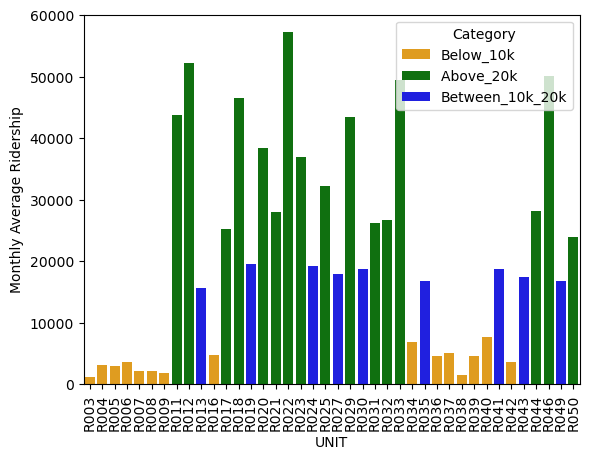

In [95]:
# Plot the dataframe to show monthly average ridership for each station
# the graph also depicts categorized groups in which each station belongs to
ridership_graph = sns.barplot(
    x = ridership_category_df.index,
    y = 'Monthly Average Ridership',
    hue = 'Category',
    data = ridership_category_df,
    palette=['orange', 'green', 'blue']
)
ridership_graph.tick_params(axis='x', rotation=90)